In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 
import numpy as np  
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score,mean_squared_error
from scipy.stats import shapiro

In [81]:
#  Reading Dataset
col=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv("dataset/housing.csv",delimiter="\s+",names=col)

In [5]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [6]:
print(df.shape)

(506, 14)


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


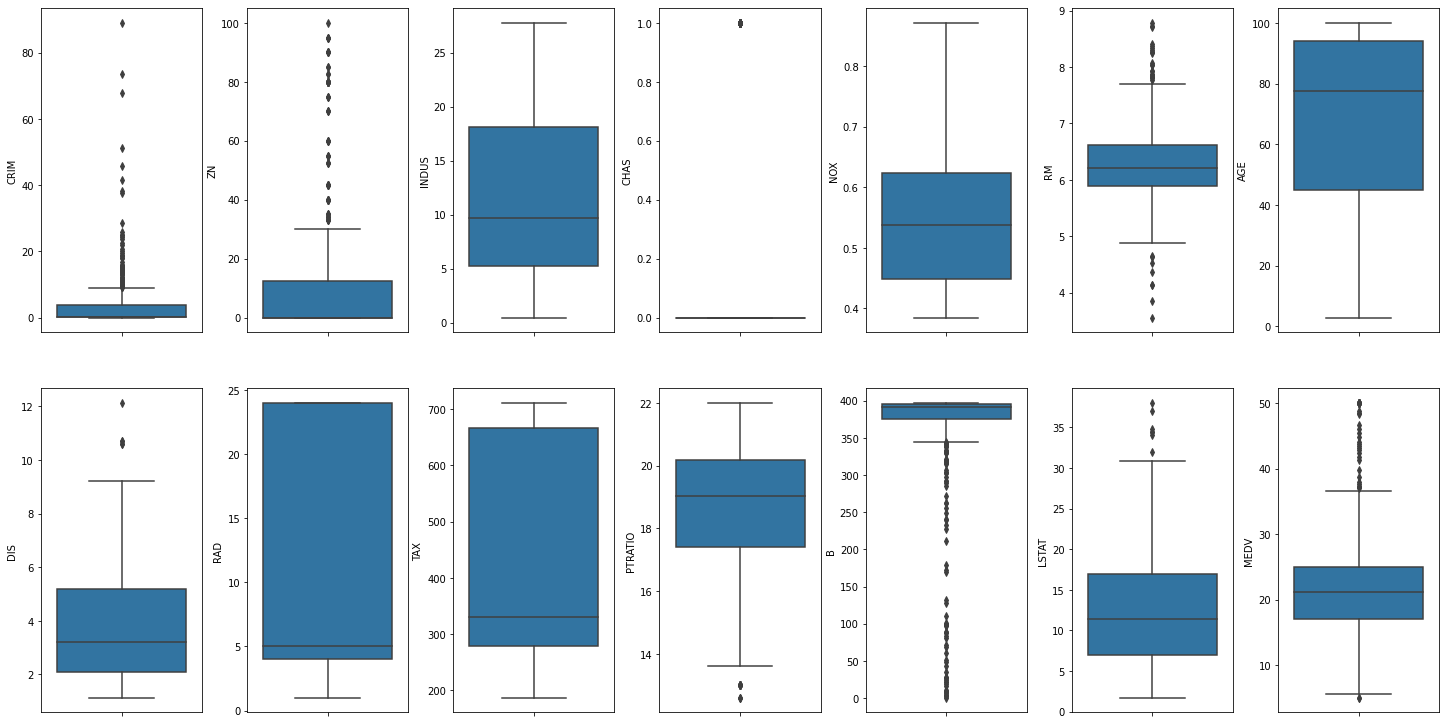

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [9]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [10]:
# Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [82]:
#  Outliers in MEDV removed
df=df.loc[~( df["MEDV"]>=50),:]

In [83]:
df.shape

(490, 14)

c:\Users\Vijay\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Vijay\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Vijay\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

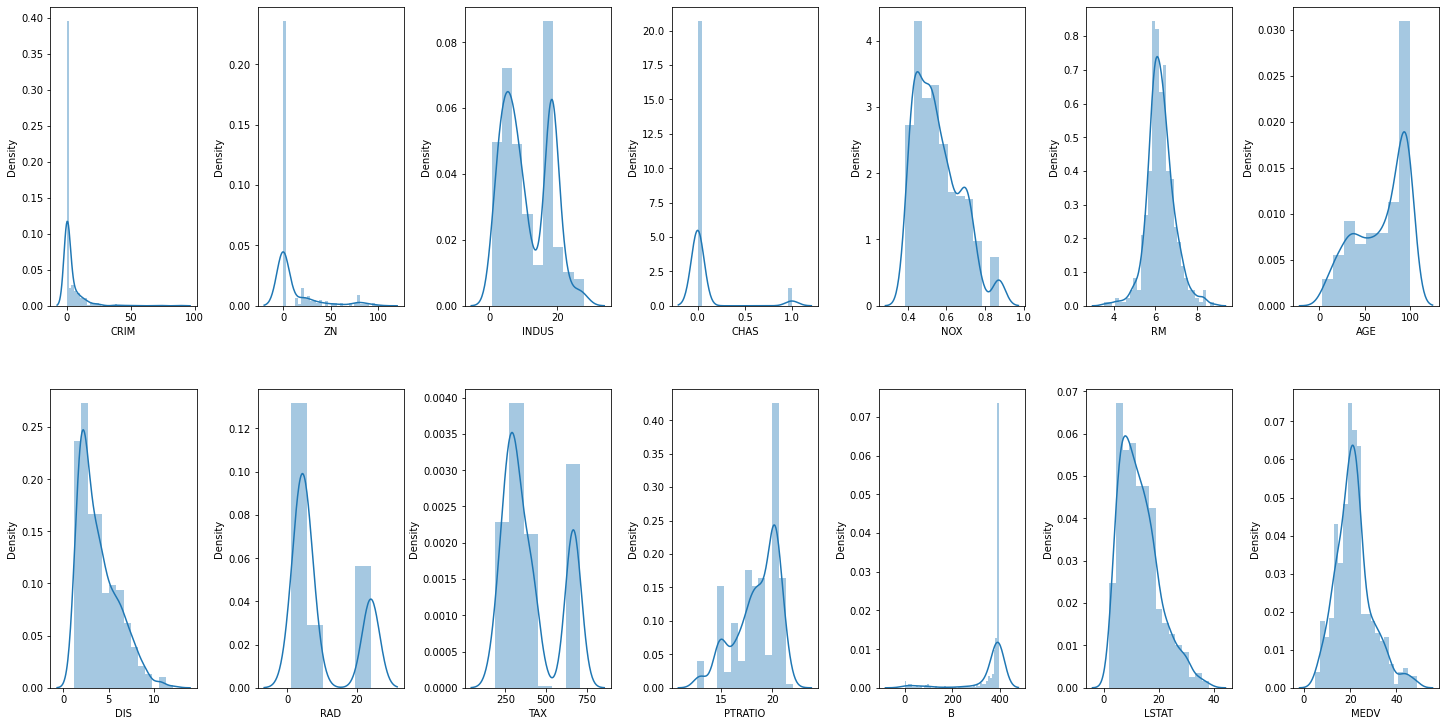

In [13]:
#   Distribution  of  features


fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<AxesSubplot:>

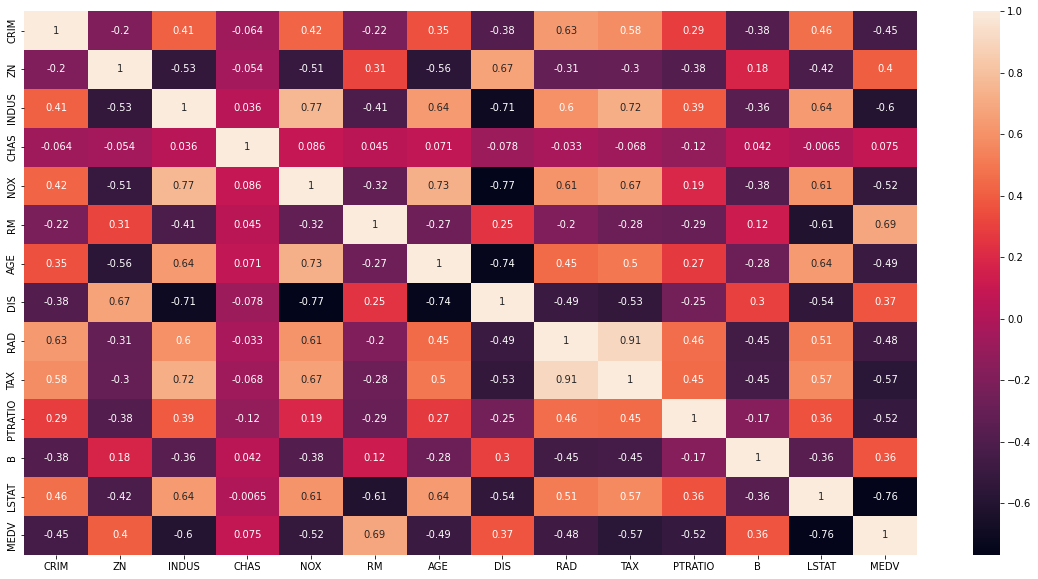

In [14]:
# Plot heatmap for correlation

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),  annot=True)

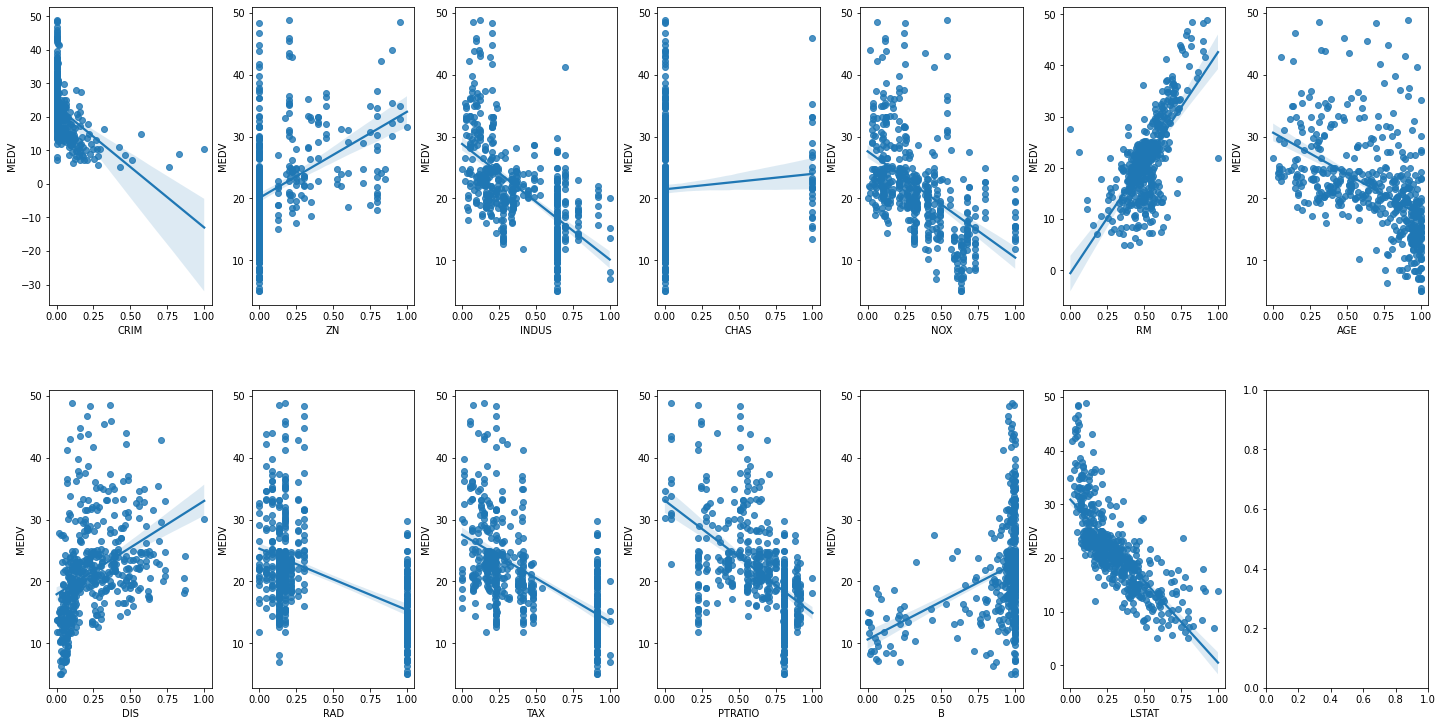

In [85]:
min_max_scaler = MinMaxScaler()
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = df.loc[:,columns]
y = df[['MEDV']]
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=columns)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(columns):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [86]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [87]:
#  Check assumptions of Linear Regression
# H0:  pearson r value =  0

columns = col=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = df.loc[:,columns]
y = df[['MEDV']]

for col in columns:
    pval=pearsonr(df[col],df["MEDV"])[1]
    if pval>0.05:
        # print("Accept H0")
        print(f"columns {col} and Medv are not linearly related ")
    else:
        # print("Reject H0")
        print(f"columns {col} and Medv are  linearly related ")

columns CRIM and Medv are  linearly related 
columns ZN and Medv are  linearly related 
columns INDUS and Medv are  linearly related 
columns CHAS and Medv are not linearly related 
columns NOX and Medv are  linearly related 
columns RM and Medv are  linearly related 
columns AGE and Medv are  linearly related 
columns DIS and Medv are  linearly related 
columns RAD and Medv are  linearly related 
columns TAX and Medv are  linearly related 
columns PTRATIO and Medv are  linearly related 
columns B and Medv are  linearly related 
columns LSTAT and Medv are  linearly related 


In [89]:
#  Feature CHAS is not linearly related to MEDV. Let us remove it.

df=df.drop(["CHAS"],axis=1)
x=x.drop(["CHAS"],axis=1)

In [92]:
# the independent variables set

  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = x.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif2_data)

    Feature        VIF
0      CRIM   2.091930
1        ZN   2.837476
2     INDUS  14.507287
3       NOX  72.996015
4        RM  86.070097
5       AGE  21.233208
6       DIS  15.051086
7       RAD  14.679348
8       TAX  58.927570
9   PTRATIO  89.127085
10        B  19.483042
11    LSTAT  12.174662


In [94]:
#  Removing PTRATIO column to  handle multicollinearity

x=x.drop(["PTRATIO"],axis=1)

  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = x.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif2_data)

   Feature        VIF
0     CRIM   2.088734
1       ZN   2.460166
2    INDUS  14.230471
3      NOX  72.906407
4       RM  63.561371
5      AGE  21.208004
6      DIS  12.850246
7      RAD  14.679340
8      TAX  56.894834
9        B  18.236593
10   LSTAT  11.167001


In [95]:
#  Removing PTRATIO   column to  handle multicollinearity

x=x.drop(["NOX"],axis=1)

  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = x.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif2_data)

  Feature        VIF
0    CRIM   2.087042
1      ZN   2.459611
2   INDUS  12.947569
3      RM  43.442177
4     AGE  19.665447
5     DIS  12.606753
6     RAD  14.677662
7     TAX  55.609534
8       B  18.040885
9   LSTAT  10.401705


In [96]:
#  Removing TAX  column to  handle multicollinearity

x=x.drop(["TAX"],axis=1)

  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = x.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif2_data)

  Feature        VIF
0    CRIM   2.087034
1      ZN   2.376688
2   INDUS   9.457176
3      RM  40.722538
4     AGE  19.609048
5     DIS  12.449811
6     RAD   5.047196
7       B  17.972976
8   LSTAT  10.182063


In [97]:
#  Removing RM  column to  handle multicollinearity

x=x.drop(["RM"],axis=1)

  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = x.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif2_data)

  Feature        VIF
0    CRIM   2.085946
1      ZN   2.355668
2   INDUS   9.109387
3     AGE  13.897149
4     DIS   8.559387
5     RAD   4.799360
6       B  13.208932
7   LSTAT   9.442941


In [98]:
#  Removing AGE   column to  handle multicollinearity

x=x.drop(["AGE"],axis=1)

  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = x.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif2_data)

  Feature        VIF
0    CRIM   2.085944
1      ZN   2.333011
2   INDUS   8.417725
3     DIS   8.357057
4     RAD   4.728769
5       B  10.030084
6   LSTAT   7.560583


In [99]:
#  Removing B   column to  handle multicollinearity

x=x.drop(["B"],axis=1)

  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = x.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif2_data)

  Feature       VIF
0    CRIM  2.056448
1      ZN  2.310553
2   INDUS  7.186051
3     DIS  3.991018
4     RAD  4.705288
5   LSTAT  7.364154


In [100]:
#  Removing LSTAT   column to  handle multicollinearity

x=x.drop(["LSTAT"],axis=1)

  
# VIF dataframe
vif2_data = pd.DataFrame()
vif2_data["Feature"] = x.columns
  
# calculating VIF for each feature
vif2_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif2_data)

  Feature       VIF
0    CRIM  1.972620
1      ZN  2.265732
2   INDUS  4.264529
3     DIS  3.417265
4     RAD  4.649956


In [101]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [106]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [109]:
lr_preds=lr.predict(xtest).ravel()

In [119]:
err=ytest.values.ravel()-lr_preds
print(err)

[ -6.34945152  12.77965754  -5.58760936   2.26198191   0.18664245
   7.92371288  -5.0078216    1.35446597   0.29981532  -4.68973416
  -4.66256339  -0.17170457  -3.4851356  -11.00648701  -0.80474025
  -6.59182575  -0.35172422  -0.28391893  -2.96099544  22.57302829
   4.09888218  -0.76495602   9.92550936  -0.32478744   4.95881563
   2.88575981   5.00809595   0.9227188   -7.45734433  -1.68929797
  -0.86379498   0.46828208   3.10554518  -9.79139326  -2.85276124
  -3.14909619  -4.86729437  -7.12518384  -6.49532956  19.69491562
  -1.85724386  -1.74997836  -1.97500636   1.16423648  11.29149234
   0.26975665  -2.96586776   2.61715233  -2.76915283   9.56455525
   2.70745225   1.83969422  -3.32446927  -3.7306475   -3.54045956
   1.61582682   7.43948202  17.70540325   4.62700966  -3.98118938
  -2.90460929  -8.70516462  -5.52648519  -4.1817066    4.15314519
   0.57419533   8.06230611   7.56869115  -9.94448171   1.52939669
  19.56144766  -4.03307054  -4.91431686   0.08730564   2.23380861
  -7.28823

In [122]:
shapiro(err)


#  pval<0.05 hence reject H0. Errors are not normally distibuted

ShapiroResult(statistic=0.9267320036888123, pvalue=7.396317300845112e-07)

c:\Users\Vijay\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

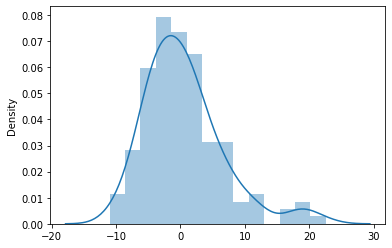

In [124]:
sns.distplot(err)

In [128]:
#  Errors not normally distributed. Let us apply Log transformation to y

l_ytrain=np.log(ytrain)
l_ytest=np.log(ytest)

In [130]:
lr1=LinearRegression()
lr1.fit(xtrain,l_ytrain)

LinearRegression()

In [132]:
pred1=lr1.predict(xtest)
err1=pred1.ravel()-ytest.values.ravel()

In [136]:

shapiro(err1)

# Still the Errors are not normally distributed. Since The Normality of errors condition not satisfied we can apply other models

ShapiroResult(statistic=0.9383801221847534, pvalue=4.891506705462234e-06)

In [137]:
def cross_validation(x,y,params,cv_num=5,):
    model_dict={"DT":DecisionTreeRegressor,"RF":RandomForestRegressor,"SVR":SVR,"SGD":SGDRegressor,"Ada":AdaBoostRegressor
    ,"Grad":GradientBoostingRegressor}
    cv_scores={}
    for model_name,model_obj in model_dict.items():
        scores=cross_val_score(model_obj(**params[model_name]),x,y.values.ravel(),cv=cv_num)
        cv_scores[model_name]={"mean":scores.mean(),"std":scores.std()}
    return cv_scores

In [142]:

col=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df11=pd.read_csv("dataset/housing.csv",delimiter="\s+",names=col)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x11 = df11.loc[:,columns]
y11 = df11[['MEDV']]

xtrain11,xtest11,ytrain11,ytest11=train_test_split(x11,y11,test_size=0.3)

parameters={"DT":{},"RF":{},"SVR":{},"SGD":{},"Ada":{},"Grad":{}}
cross_validation(xtrain11,ytrain11,parameters)

{'DT': {'mean': 0.7380117576663096, 'std': 0.03944194881219345},
 'RF': {'mean': 0.8529333777252873, 'std': 0.053109161650477445},
 'SVR': {'mean': 0.18617983218552372, 'std': 0.04454354205067576},
 'SGD': {'mean': -6.973487804215219e+25, 'std': 6.998840347571647e+25},
 'Ada': {'mean': 0.815191332532178, 'std': 0.05984977315335963},
 'Grad': {'mean': 0.877870668104751, 'std': 0.04318361737277489}}

In [143]:
# Random Forest seems to be working good

In [144]:
rf_model=RandomForestRegressor()
rf_model.fit(xtrain11,ytrain11)

C:\Users\Vijay\AppData\Local\Temp\ipykernel_3000\1209051281.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(xtrain11,ytrain11)


RandomForestRegressor()

In [145]:
rf_preds=rf_model.predict(xtest11)

In [155]:
print("R2 value for Random Forest model",r2_score(ytest11.values.ravel(),rf_preds))
print("RMSE value for Random Forest model",np.sqrt(mean_squared_error(ytest11.values.ravel(),rf_preds)))

R2 value for Random Forest model 0.9048015288464193
RMSE value for Random Forest model 2.6257250427262946
